# Homework 1

**Start date:** *18th Jan 2017*

**Due date:** *04 February 2017, 11:55 pm*

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw1.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We will not re-run your code.

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).

## The Assignment

### Objectives

You will use TensorFlow to implement several neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

Hint: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on 20% of the **train** set and on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    #for j, (setting, train_accuracy, test_accuracy) in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    #for j, (setting, train_accuracy, test_accuracy) in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# Model 1 (20 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]



In [3]:
print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  initializer = tf.contrib.layers.xavier_initializer()
  W = tf.Variable(initializer([784,10]))
  b = tf.Variable(initializer([10]))
  y = tf.matmul(x,W)+b  
  #y = tf.nn.softmax(logit)
  
  cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y))
  
  correct = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
 
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
  
  train_setlen = int(len(mnist.train.images)*0.2)

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size) #log_period_samples=20000/100==200
  with tf.train.MonitoredSession() as sess:    
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      
      sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        #y = tf.nn.softmax(tf.matmul(x,W)+b)
       
        train_accuracy.append(sess.run(accuracy, feed_dict={x: mnist.train.images[0:train_setlen,:],y_: mnist.train.labels[0:train_setlen,:]}))
        #train_accuracy = accuracy.eval(feed_dict={x: batch_xs, y_: batch_ys})
        #####################################
        # Compute and store test accuracy.  #
        ####################################
        test_accuracy.append(sess.run(accuracy, feed_dict={x: eval_mnist.test.images,y_: eval_mnist.test.labels}))
        #test_accuracy = sess.run(accuracy, feed_dict={x: eval_mnist.test.images,y_: eval_mnist.test.labels})
       

  experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

  

#plot_learning_curves(experiments_task1)
#plot_summary_table(experiments_task1)

Training Model 1
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.g

# Model 2 (20 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]


In [5]:
print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders() #x[,784]
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  initializer = tf.contrib.layers.xavier_initializer()
  W1 = tf.Variable(initializer([784,32]))
  b1 = tf.Variable(initializer([32])) 
  hidden1 = tf.matmul(x,W1)+b1 
  output1 = tf.nn.relu(hidden1)  #num*32
  
  W2 = tf.Variable(initializer([32,10]))
  b2 = tf.Variable(initializer([10]))
  y = tf.matmul(output1,W2)+b2 
  
#   y = tf.nn.softmax(logit)
  cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y))
  
  correct = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
 
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
  
  train_setlen = int(len(mnist.train.images)*0.2)
  




  
  

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        train_accuracy.append(sess.run(accuracy, feed_dict={x: mnist.train.images[0:train_setlen,:],y_: mnist.train.labels[0:train_setlen,:]}))
        test_accuracy.append(sess.run(accuracy, feed_dict={x: eval_mnist.test.images,y_: eval_mnist.test.labels}))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################

    experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

    
#plot_learning_curves(experiments_task2)
#plot_summary_table(experiments_task2)

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

# Model 3 (20 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [7]:
print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  initializer = tf.contrib.layers.xavier_initializer()
  W1 = tf.Variable(initializer([784,32]))
  b1 = tf.Variable(initializer([32])) 
  hidden1 = tf.matmul(x,W1)+b1 
  output1 = tf.nn.relu(hidden1)  #num*32
  
  W2 = tf.Variable(initializer([32,32]))
  b2 = tf.Variable(initializer([32])) 
  hidden2 = tf.matmul(output1,W2)+b2 
  output2 = tf.nn.relu(hidden2)  #num*32
  
  W3 = tf.Variable(initializer([32,10]))
  b3 = tf.Variable(initializer([10]))
  y = tf.matmul(output2,W3)+b3 
  

  cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y))
  
  correct = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
 
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
  
  train_setlen = int(len(mnist.train.images)*0.2)





  
  

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        train_accuracy.append(sess.run(accuracy, feed_dict={x: mnist.train.images[0:train_setlen,:],y_: mnist.train.labels[0:train_setlen,:]}))
        test_accuracy.append(sess.run(accuracy, feed_dict={x: eval_mnist.test.images,y_: eval_mnist.test.labels}))
        
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################

    experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))


#plot_learning_curves(experiments_task3)
#plot_summary_table(experiments_task3)

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 


In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [9]:
print('Training Model 4')

def weight_variable(shape):
  initial = tf.truncated_normal(shape,stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1,shape=shape)
  return tf.Variable(initial)

def conv2d(x,W):
  return tf.nn.conv2d(x,W,strides=[1, 1, 1, 1],padding='SAME')

def max_pool(x):
  return tf.nn.max_pool(x,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')
  
  

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  

  #layer1:conv:3*3*8
  W_conv1 = weight_variable([3,3,1,8])
  b_conv1 = bias_variable([8])
  h_conv1 = conv2d(x_image,W_conv1)
  h_conv1 = tf.nn.relu(h_conv1+b_conv1)
  h_pool1 = max_pool(h_conv1) #28/2=14
  
  W_conv2 = weight_variable([3,3,8,8])
  b_conv2 = bias_variable([8])
  h_conv2 = conv2d(h_pool1, W_conv2)
  h_conv2 = tf.nn.relu(h_conv2+b_conv2)
  h_pool2 = max_pool(h_conv2)
  
  #flatten
  h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*8])
  
  #non-linear
  W = weight_variable([7*7*8,32]) 
  b = bias_variable([32])
  
  h_nonlinear = tf.nn.relu(tf.matmul(h_pool2_flat,W)+b)
  
  W_out = weight_variable([32,10])
  b_out = bias_variable([10])
  y = tf.matmul(h_nonlinear,W_out)+b_out
  
  cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y))
  
  correct = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
 
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
  
  train_setlen = int(len(mnist.train.images)*0.2)  

 


  
  

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        train_accuracy.append(sess.run(accuracy, feed_dict={x: mnist.train.images[0:train_setlen,:],y_: mnist.train.labels[0:train_setlen,:]}))
        test_accuracy.append(sess.run(accuracy, feed_dict={x: eval_mnist.test.images,y_: eval_mnist.test.labels}))
        
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################

    experiments_task4.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

# Results

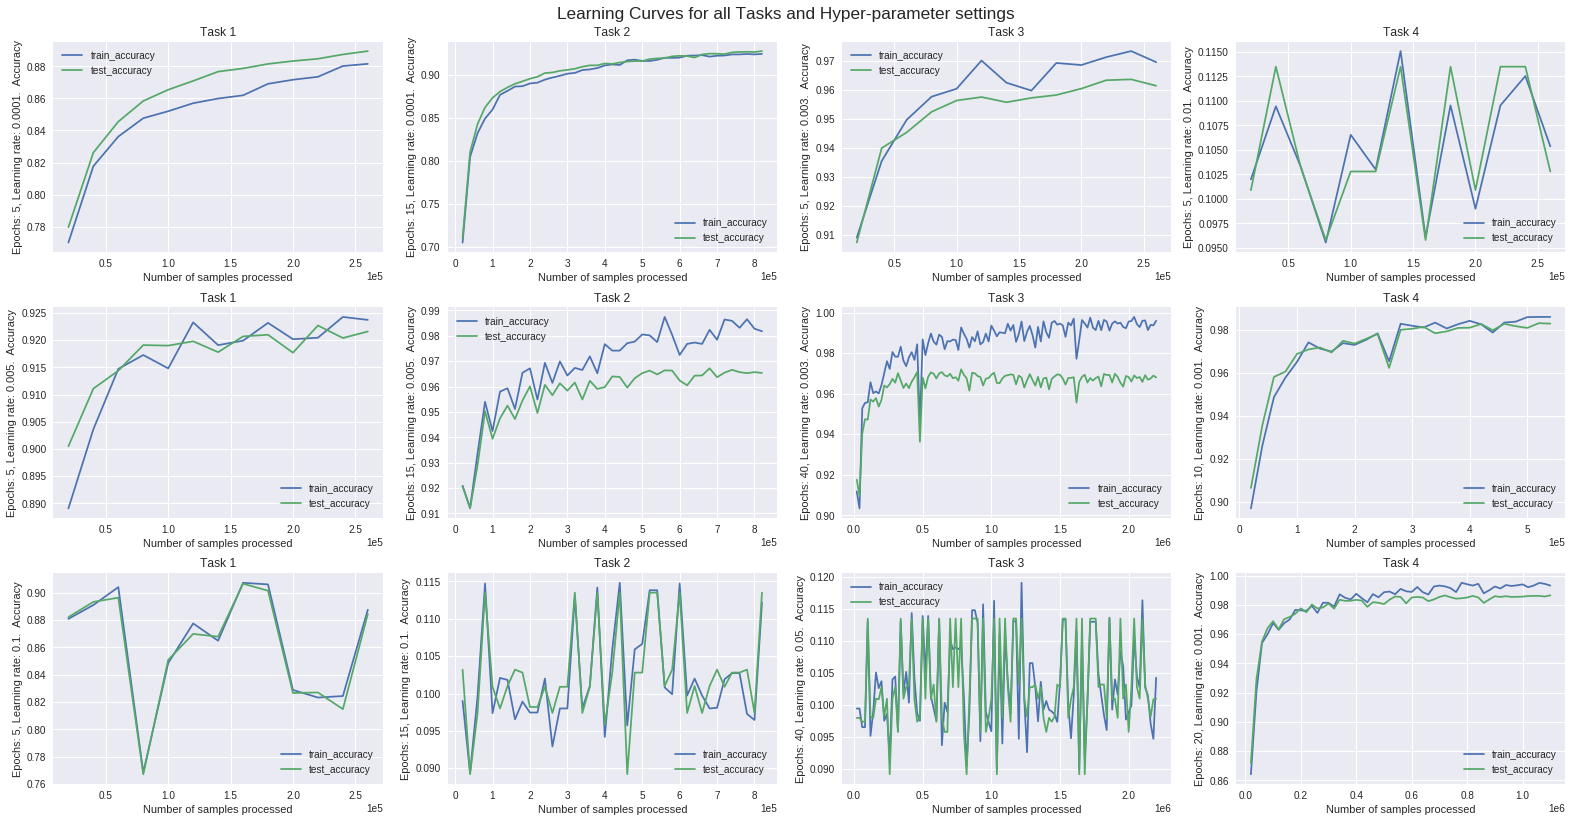

In [10]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

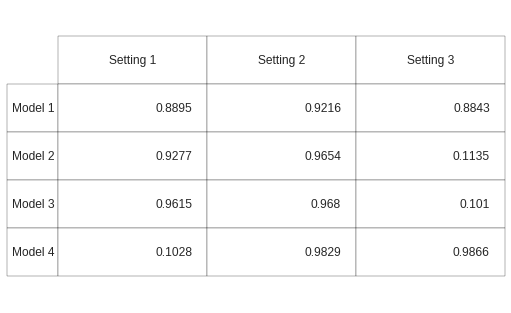

In [11]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

# Questions

### Q1 (5 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?

Model2-setting2 and model3-setting2 are overfitting. As it can be seen from the above graphs there are clear gaps between train accuracy and test accuracy and moreover, the train accuracy are extremely high in these two experiments.

Compared with model2-setting1, the reason for overfitting in model2-setting2 is the larger learning rate in setting2 than that in setting1. With a larger learning rate,  model2-setting2 converge to its optimal earlier than setting1. However, the epoch of setting2 is equal to setting1. After reaching to its optimal values, continue to train the model result in model2-setting2 overfitting the noise in data. 

As for model3-setting2, the reason of overfitting is the large value of epoch which lead to the model continuing to fit the noise in training set after reaching its optimal values.

### Q2 (5 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?
Model2-setting3, model3-setting3 and model4-setting1 are all underfitting. As it can be seen from the above graphs, both train accuracy and test accuracy are very low in these three experiments. Model1-setting1 is slightly underfitting.

As for model2-setting3, model3-setting3 and model4-setting1,the accuracy rates of training and test both fluctuate all the time and don't show an upward trend. Hence, the reason for underfitting is the large learning rate, which results in the gradient descent missing its optimal value.

Compared with model1-setting2, the epcho value of model1-setting1 is the same as that of model1-setting2. However, the learning rate of setting1 is much smaller than that of setting2, which results in the training process of model1-setting1 stop before model reach its optimal value.



### Q3 (10 pts): How would you prevent over-/under-fitting from happening?

To prevent overfitting:

1. Control the complexity of model using some regularizations: L2 regularization, dropout regularization

2. Using a small proportion of training set as validation set or using cross validation technique to tune the hyperparameters: epoch and learning rate. Make sure that the epoch of model is not too large. 

3. Stop the training process in advance when the model reach its optimal

4. Add noise to data and train a model which can get the correct labels from the noisy data

5. Add new training set instead of conduct more epochs

To prevent underfitting:

1. Using a small proportion of training set as validation set or using cross validation technique to tune the hyperparameters: epoch and learning rate. Make sure that the epoch of model is big enough to reach the optimal and the learning rate is not too large to miss the optimal.

2. Increase the complexity of model by adding hidden layers or nodes



# Extension (Ungraded)

In the previous tasks you have used plain Stohastic Gradient Descent to train the models.

There is a large literatures on variants of Stochastic Gradient Descent, that improve learning speed and robustness to hyper-parameters.

[Here](https://www.tensorflow.org/api_docs/python/train/optimizers) you can find the documentation for several optimizers already implemented in TensorFlow, as well as the original papers proposing these methods.*italicized text*.

AdamOptimizer and RMSProp are among the most commonly employed in Deep Learning.

How does replacing SGD with these optimizers affect the previous results?

In [0]:
# Feel free to experiment!